# Exercises 12

## Exercise 12.1

This exercise consists of creating a deep feed-forward Neural Network which is trained to recongize digits from 0 to 9 using the MNIST dataset, an online dataset accessible via the Keras library, it is made of 70000 handwritten digits, 60000 of them are used to train the Network and the other 10000 are used to test it.

#### Neural Network architecture
Starting from the Network provided I chose to use the following structure:
1. first **Dense** layer of 400 neurons with actiovation function ReLU and input shape described below,
2. second **Dense** layer of 200 neurons, instead of 100, in order to increase representativeness with actiovation function ReLU,
3. a **Dropout** layer with drop rate of 50 %, to avoid the overfitting of the parameters, and prevent the DNN from learning the data,
4. a final **Dense** layer with actiovation function Soft Max, which allows a categorical output.

I decided to train the Network for at least 7 epochs, I also tried with 10 epochs, but the results did not improve.

#### Data reshape
The given data are made of two arrays of 70000 components each, divided in traing (60000) and validation (10000). The first one is an array of 28 x 28 pixels images with white digits onto a black background, and the second one is an array of 60000 components containing the labels of the images.
A reshape of both inputs is needed to perform a categorical training using a Deep Neural Network:
* X reshape: in order to "feed" the Deep Neural Network, each image contained in the data array needs to be reshaped onto an array of 28 x 28 components,
* Y reshape: in order to train the Deep Neural Network to provide a categorical output, the labels need to be set to categorical in order to use categorical crossentropy as loss to train the Network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# setup random number generators
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# image properties
img_x, img_y = 28, 28
# number of categories
num_class = 10

In [2]:
# the data, split between train and test sets
(x_t, y_t), (x_v, y_v) = mnist.load_data()
print("Data loading")
print("x_t shape:", x_t.shape)
print("y_t shape:", y_t.shape)

# reshape data ("vector" input)
x_t = x_t.reshape(x_t.shape[0], img_x * img_y)
x_v = x_v.reshape(x_v.shape[0], img_x * img_y)
# float -> single precision
x_t = x_t.astype("float32")
x_v = x_v.astype("float32")
# rescale into interval [0, 1)
x_t /= 255
x_v /= 255
# convert class vectors to binary class matrices (to use categorical_crossentropy)
y_t = tf.keras.utils.to_categorical(y_t, num_class)
y_v = tf.keras.utils.to_categorical(y_v, num_class)

print("\n"+"After reshaping")
print("x_t shape:", x_t.shape)
print("y_t shape:", y_t.shape)

Data loading
x_t shape: (60000, 28, 28)
y_t shape: (60000,)

After reshaping
x_t shape: (60000, 784)
y_t shape: (60000, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def CreateDNN():
    # model
    model = Sequential()
    # dense layer
    model.add(Dense(400, input_shape=(img_x * img_y, ), activation="relu"))
    # dense layer
    model.add(Dense(200, activation="relu"))
    # dropout layer
    model.add(Dropout(0.5))
    # softmax layer (categorical)
    model.add(Dense(num_class, activation="softmax"))
    return model

print("Model created successfully")

def CompileModel():
    # create the model
    model = CreateDNN()
    # compile the model
    model.compile(loss = tf.keras.losses.categorical_crossentropy,
                  optimizer = Adam(), metrics=["acc"])
    return model

print("Model compiled successfully")

model_DNN = CompileModel()
model_DNN.summary()

Model created successfully
Model compiled successfully
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [4]:
# training parameters
bsize = 10
nepoc = 10
# precautional reshape to avoid strange effects
x_v = x_v.reshape(x_v.shape[0], img_x * img_y)
# train model
history = model_DNN.fit(x_t, y_t, batch_size = bsize,
                        epochs = nepoc, validation_data=(x_v, y_v), shuffle=True)
# Save model on file
save_model_path="Saved/Exercise_12_1.h5"
model_DNN.save(filepath=save_model_path, include_optimizer=True)

Epoch 1/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.2331 - acc: 0.9308 - val_loss: 0.1245 - val_acc: 0.9628
Epoch 2/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1172 - acc: 0.9662 - val_loss: 0.0917 - val_acc: 0.9746
Epoch 3/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0919 - acc: 0.9730 - val_loss: 0.1125 - val_acc: 0.9694
Epoch 4/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0753 - acc: 0.9786 - val_loss: 0.0959 - val_acc: 0.9755
Epoch 5/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0692 - acc: 0.9808 - val_loss: 0.0850 - val_acc: 0.9779
Epoch 6/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0605 - acc: 0.9831 - val_loss: 0.0946 - val_acc: 0.9787
Epoch 7/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0572 - acc: 0.9840 - val_loss: 0.1077 - val_acc: 0.9779
Epoch 8/10
6000/6000 [==============================] - 7s 1ms

The following two plots represent the loss and the accuracy of the trained **DNN**, it is possible to notice that the training loss is decreasing epoch by epoch and the training accuracy is increasing, instead, while the validation loss and accuracy do not have the same trend, this is probably due to the fact that the neural network does not train on the validation data, so, although the network gets better and better on recognizing the training data, could not be able to interpret some digits, nor at the begining nor at the end of the training session.

313/313 [==============================] - 0s 710us/step - loss: 0.1230 - acc: 0.9791

Test loss = 0.123
Test accuracy = 0.979


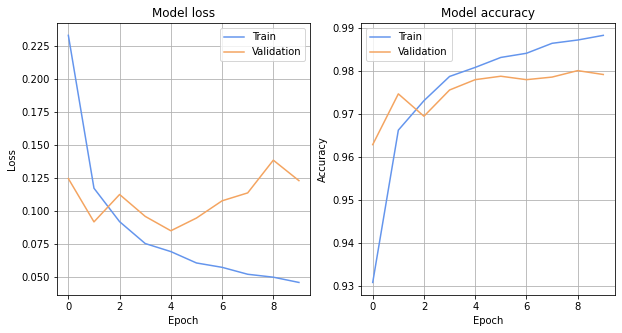

In [5]:
# Reload model
model_DNN = tf.keras.models.load_model(filepath=save_model_path)
# precautional reshape to avoid strange effects
x_v = x_v.reshape(x_v.shape[0], img_x * img_y)
# model evaluation
score = model_DNN.evaluate(x_v, y_v)

# print performance
print()
print("Test loss =", round(score[0], 3))
print("Test accuracy =", round(score[1], 3))

fig = plt.figure(figsize=[10, 5])

# summarize history for loss
fig.add_subplot(1, 2, 1)
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(history.history["loss"], color="cornflowerblue")
plt.plot(history.history["val_loss"], color="sandybrown")
plt.legend(["Train", "Validation"], loc="best")
plt.grid()
# summarize history for accuracy
fig.add_subplot(1, 2, 2)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history.history["acc"], color="cornflowerblue")
plt.plot(history.history["val_acc"], color="sandybrown")
plt.legend(["Train", "Validation"], loc="best")
plt.grid()

plt.show()

### Predictions

In order to prove that some good results have been reached, one can test the model, using the usual predict method, by making the network try to recognize some of the validation data. It is interesting to see how the output comes out of the network, so one can look at the plots below each digit, there is shown the level of confidence of the prediction. In order to investigate different regions of the validation set, one can change the value of the *drift* variable, between 0 and 9990.

In particular, the case exposed below shows an error, the third digit is predicted to be a 4, while it is a 9, but one can see that the confidence of the prediction is not 1, indeed, the network says that there's a non zero *probability* that the digit investigated is a 9.

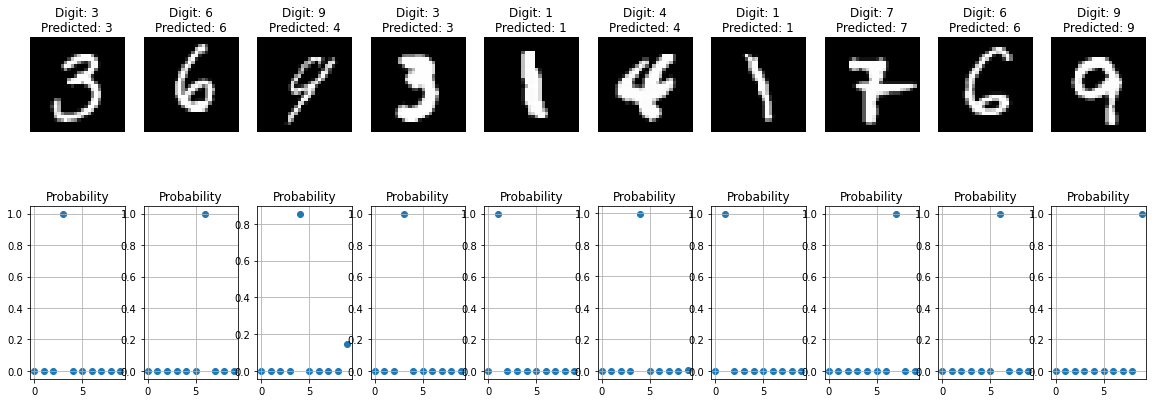

In [6]:
# drift to explore different data
drift = 90
# precautional reshape to avoid strange effects
x_v = x_v.reshape(x_v.shape[0], img_x * img_y)
predictions = model_DNN.predict(x_v)
# reshape to print figures
x_v = x_v.reshape(x_v.shape[0], img_x, img_y,1)
# plot show
plt.figure(figsize=(20, 7)) 
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(y_v[drift + i]), np.argmax(predictions[drift + i])))
    plt.imshow(x_v[drift + i, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.title("Probability")
    plt.scatter(np.arange(10), predictions[drift + i])
    plt.grid()
plt.show()